Évaluation des résultats de lemmatisation 
==================================

## Objectifs

1. Lecture des logs
2. Alignement avec types de modèles
3. Lectures des résultats

## Data acquisition

In [1]:
import glob
import copy
from pandas import DataFrame

# IMPORTANT: THIS IS HARD CODED, SUPPORT FOR ALL LEMMA FROM DEV SET

nb_words_dev_set = 40812


ModelScheme = {
    "config": "",
    "tar": "",
}
file = "./logs/single-tasks-retrain-lemma.log"

def parse_lines(lines, task_prefix="## ", is_file=True):
    models = []
    tasks = []
    config = None
    current_task = None
    template = {
        "scores": {},
        "eval-time": [],
        "optimizer": "adam"
    }
    current = copy.deepcopy(template)
    for line in lines:
        if is_file and line.startswith("config_path: "):
            current["config"] = line.strip()[len("config_path: "):]
        elif is_file and line.startswith("cemb_dim: "):
            current["cemb_dim"] = line.strip()[len("cemb_dim: "):]
        elif is_file and line.startswith("cell: "):
            current["cell"] = line.strip()[len("cell: "):]
        elif is_file and line.startswith("hidden_size: "):
            current["hidden_size"] = line.strip()[len("hidden_size: "):]
        elif is_file and line.startswith("optimizer: "):
            current["optimizer"] = line.strip()[len("optimizer: "):]
        elif is_file and "Bye" in line.strip():
            models.append(current)
            current = copy.deepcopy(template)
            current_task = None
        elif line.startswith(task_prefix):
            current_task = line.strip()[len(task_prefix):]
            tasks.append(current_task)
            current["scores"][current_task] = {}
            current["task"] = current_task
        elif current_task and line.startswith("|"):  # We already have a task recorded
            cat, acc, pre, rec, sup = [x.strip() for x in line.strip().split("|") if x]
            if sup == "support" or "---" in sup:
                continue
            current["scores"][current_task][cat] = (float(acc)*100, float(pre)*100, float(rec)*100, int(sup))
        elif is_file and ".tar" in line:
            current["file"] = line.strip()[len("Saved best model to: ["):-1]
        #elif is_file and "Finished training in " in line:
        #    current["training-time"] = float(line.strip()[len("2020-04-23 23:13:33,251 : Finished training in ["):-1])
        #elif is_file and "Starting epoch" in line:
        #    current["nb-epochs"] = int(line.strip()[len("2020-04-23 20:23:00,051 : Starting epoch ["):-1])
        #elif is_file and "Evaluation time: " in line:
        #    current["eval-time"].append(
        #        float(line.strip()[len("2020-04-24 04:04:56,425 : Evaluation time: "):-len(" sec")])
        #    )
    if not is_file:
        current["file"] = f"default-{len(models)}"
        models.append(current)
    models = {
        model.get("file", "default"): model for model in models
    }
    tasks = {
        task: [model for model in models.values() if model["task"] == task]
        for task in tasks
    }
    return models, tasks

with open(file) as f:
    _, tasks = parse_lines(f)


## Reference score

In [2]:
REF_NO_NOMPRO = """#### lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9734   | 0.8216    | 0.8196 | 169822  |
| known-tokens     | 0.9785   | 0.907     | 0.907  | 161674  |
| unknown-tokens   | 0.8716   | 0.7172    | 0.7153 | 8148    |
| ambiguous-tokens | 0.9292   | 0.7114    | 0.7171 | 41561   |
| unknown-targets  | 0.4775   | 0.3136    | 0.3115 | 1131    |


#### pos

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9651   | 0.8794    | 0.8669 | 169822  |
| known-tokens     | 0.9672   | 0.8808    | 0.8703 | 161674  |
| unknown-tokens   | 0.9232   | 0.6979    | 0.6511 | 8148    |
| ambiguous-tokens | 0.91     | 0.8234    | 0.784  | 52129   |


#### Gend

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.965    | 0.9166    | 0.9203 | 169822  |
| known-tokens     | 0.9673   | 0.9198    | 0.9248 | 161674  |
| unknown-tokens   | 0.9201   | 0.8673    | 0.8543 | 8148    |
| ambiguous-tokens | 0.868    | 0.8652    | 0.8747 | 34690   |


#### Numb

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9719   | 0.9705    | 0.9697 | 169822  |
| known-tokens     | 0.9731   | 0.9716    | 0.9705 | 161674  |
| unknown-tokens   | 0.9482   | 0.9224    | 0.9358 | 8148    |
| ambiguous-tokens | 0.9042   | 0.9013    | 0.8979 | 38122   |


#### Case

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9219   | 0.8811    | 0.8177 | 169822  |
| known-tokens     | 0.9244   | 0.8865    | 0.8237 | 161674  |
| unknown-tokens   | 0.8719   | 0.6896    | 0.6738 | 8148    |
| ambiguous-tokens | 0.8296   | 0.8196    | 0.7667 | 63352   |


#### Deg

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9813   | 0.9694    | 0.971  | 169822  |
| known-tokens     | 0.9832   | 0.9711    | 0.9746 | 161674  |
| unknown-tokens   | 0.9434   | 0.9345    | 0.9149 | 8148    |
| ambiguous-tokens | 0.9186   | 0.906     | 0.9258 | 27870   |


#### Mood_Tense_Voice

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9831   | 0.7845    | 0.7355 | 169822  |
| known-tokens     | 0.9868   | 0.8039    | 0.7632 | 161674  |
| unknown-tokens   | 0.91     | 0.6172    | 0.5863 | 8148    |
| ambiguous-tokens | 0.924    | 0.6879    | 0.675  | 16963   |


#### Person

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9971   | 0.9875    | 0.9772 | 169822  |
| known-tokens     | 0.9978   | 0.989     | 0.9814 | 161674  |
| unknown-tokens   | 0.9834   | 0.9762    | 0.9536 | 8148    |
| ambiguous-tokens | 0.9768   | 0.9391    | 0.9068 | 10040   |


#### Dis

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9727   | 0.879     | 0.8797 | 169822  |
| known-tokens     | 0.9738   | 0.8803    | 0.8823 | 161674  |
| unknown-tokens   | 0.9519   | 0.6651    | 0.5761 | 8148    |
| ambiguous-tokens | 0.912    | 0.8603    | 0.8649 | 41821   |
""".split("\n")

ref, ref_tasks = parse_lines(REF_NO_NOMPRO, "#### ", is_file=False)

## Tabulate data

In [3]:
column = [
    "file", "task", "config",
    "optimizer", "cell", "hidden", "cemb",
    "score",
    *[
        f"{'-'.join([x[:3] for x in cat.split('-')])}-{score[:3]}"
        for cat in tasks["lemma"][0]["scores"]["lemma"]
        for score in ("acc", "prec", "rec")
    ],
    *[
        f"rank-{'-'.join([x[:3] for x in cat.split('-')])}-{score[:3]}"
        for cat in tasks["lemma"][0]["scores"]["lemma"]
        for score in ("acc", "prec", "rec")
    ]
]


table = []
for task, files in tasks.items():
    for model in files:
        table.append([
            model["file"],
            task,
            f'{model["optimizer"]}-{model["cell"]}-H{model["hidden_size"]}-C{model["cemb_dim"]}',
            model["optimizer"],
            model["cell"],
            model["hidden_size"],
            model["cemb_dim"],
            .0, # Future Ranking Score
            # Scores
            *[
                score
                for cat in tasks["lemma"][0]["scores"]["lemma"]
                for score in model["scores"][task].get(cat, [.0, .0, .0])[:3]
            ],
            *[
                .0
                for cat in tasks["lemma"][0]["scores"]["lemma"]
                for score in model["scores"][task].get(cat, [.0, .0, .0])[:3]
            ]
        ])
    
table = sorted(table, key=lambda x: f"{x[1]}.{x[8]*100:.2f}")  # 2 is acc, 3 amb, 5 tokens
table = [column] + table

In [4]:
import tabulate
from IPython.display import HTML, display


In [5]:
with open("3 - Optimisation des Modeles - Entrainement comme tache unique - Models - Full.csv", "w") as f:
    import csv
    writer = csv.writer(f)
    writer.writerows(table)

# Attempt at ranking

In [6]:
ranks = DataFrame(
    [x[1:] for x in table[1:]],
    columns=column[1:],
    index=[x[0] for x in table[1:]]
)
needs_ranking = column[8:column.index('rank-all-acc')]
    
for task in tasks:
    ranking_subset = needs_ranking if task == "lemma" else needs_ranking[:-3]
    for col in ranking_subset:
        #ranks[f"rank-{col}"] = ranks[col].rank(ascending=False)
        ranks[f"rank-{col}"] += ranks.where(ranks['task'].eq(task))[col].rank(ascending=False).fillna(0)

    #ranks["score"] = sum(
    #    ranks.where(ranks['task'].eq(task))[[f"rank-{col}" for col in needs_ranking]].fillna(0)
    #) / len(ranking_subset)

ranks["score"] += (sum([ranks[f"rank-{col}"].where(ranks['task'].eq("lemma")) for col in needs_ranking]) / (len(needs_ranking))).fillna(0)
ranks["score"] += (sum([ranks[f"rank-{col}"].where(ranks['task'].ne("lemma")) for col in needs_ranking]) / (len(needs_ranking)-3)).fillna(0)

ranks.to_csv("3 - Optimisation des Modeles - Entrainement comme tache unique - Models - Experiment Ranger Adams Hidden - Ranks.csv")

In [7]:
display(HTML(ranks.sort_values(["task", "score"]).to_html()))

,task,config,optimizer,cell,hidden,cemb,score,all-acc,all-pre,all-rec,kno-tok-acc,kno-tok-pre,kno-tok-rec,unk-tok-acc,unk-tok-pre,unk-tok-rec,amb-tok-acc,amb-tok-pre,amb-tok-rec,unk-tar-acc,unk-tar-pre,unk-tar-rec,rank-all-acc,rank-all-pre,rank-all-rec,rank-kno-tok-acc,rank-kno-tok-pre,rank-kno-tok-rec,rank-unk-tok-acc,rank-unk-tok-pre,rank-unk-tok-rec,rank-amb-tok-acc,rank-amb-tok-pre,rank-amb-tok-rec,rank-unk-tar-acc,rank-unk-tar-pre,rank-unk-tar-rec
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_04-19_16_16.tar,lemma,Ranger-LSTM-H128-C300,Ranger,LSTM,128,300,5.900000,97.24,83.59,83.19,97.68,90.27,90.27,88.49,74.98,74.52,92.25,68.52,69.30,62.33,45.89,45.66,6.5,2.0,2.0,10.0,5.0,6.0,4.0,4.0,4.0,13.5,7.0,7.0,7.0,5.5,5.0
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_05-19_20_02.tar,lemma,Ranger-LSTM-H128-C250,Ranger,LSTM,128,250,8.200000,97.21,83.19,82.72,97.66,89.98,89.88,88.24,74.59,74.06,92.29,68.50,69.43,63.31,46.80,46.50,13.0,5.5,7.5,14.0,13.0,14.0,9.0,8.0,7.5,11.0,8.5,6.0,2.0,2.0,2.0
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_08-16_59_43.tar,lemma,Ranger-LSTM-H170-C250,Ranger,LSTM,170,250,8.500000,97.34,83.19,82.84,97.79,90.10,90.08,88.44,74.60,74.06,92.73,68.98,69.49,61.63,44.63,44.44,1.0,5.5,5.0,1.0,10.0,10.0,6.0,7.0,7.5,1.0,2.0,5.0,22.0,22.5,22.0
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_06-11_52_46.tar,lemma,Ranger-LSTM-H170-C200,Ranger,LSTM,170,200,9.066667,97.28,82.87,82.38,97.74,89.67,89.63,88.06,74.24,73.71,92.63,68.73,69.29,63.66,47.10,46.93,3.0,11.0,15.0,5.0,22.5,23.5,13.0,12.0,12.0,3.0,5.0,8.0,1.0,1.0,1.0
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_07-02_16_55.tar,lemma,Ranger-LSTM-H128-C200,Ranger,LSTM,128,200,9.333333,97.23,83.20,82.85,97.66,89.67,89.64,88.65,75.07,74.74,92.32,67.89,69.13,62.33,45.78,45.62,10.0,4.0,4.0,14.0,22.5,21.5,1.5,2.0,2.0,10.0,17.0,11.0,7.0,7.0,6.5
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_07-00_43_32.tar,lemma,Ranger-LSTM-H170-C200,Ranger,LSTM,170,200,9.433333,97.31,83.10,82.72,97.76,89.77,89.77,88.45,74.61,74.15,92.70,67.95,68.89,62.07,45.37,45.08,2.0,7.0,7.5,4.0,19.0,18.0,5.0,6.0,6.0,2.0,14.0,14.0,13.0,12.0,12.0
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_05-14_44_56.tar,lemma,Ranger-LSTM-H128-C250,Ranger,LSTM,128,250,9.633333,97.23,83.73,83.36,97.67,90.25,90.21,88.65,75.22,74.79,92.22,67.77,68.66,61.89,45.05,44.79,10.0,1.0,1.0,11.5,6.0,7.0,1.5,1.0,1.0,15.0,20.0,17.0,17.5,17.0,18.0
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_04-17_28_36.tar,lemma,Ranger-LSTM-H128-C300,Ranger,LSTM,128,300,11.000000,97.18,83.26,82.88,97.61,89.83,89.76,88.56,75.05,74.58,92.05,68.06,68.58,62.51,45.89,45.62,15.0,3.0,3.0,23.5,18.0,19.0,3.0,3.0,3.0,27.0,11.5,19.0,5.0,5.5,6.5
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_07-16_50_56.tar,lemma,Ranger-LSTM-H128-C200,Ranger,LSTM,128,200,12.233333,97.24,82.77,82.19,97.70,89.59,89.47,88.10,74.05,73.59,92.50,68.50,69.14,62.78,46.08,45.82,6.5,14.0,21.0,8.5,28.0,29.0,11.0,14.0,14.0,8.0,8.5,10.0,3.0,4.0,4.0
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_09-01_06_17.tar,lemma,Ranger-LSTM-H170-C250,Ranger,LSTM,170,250,16.366667,97.19,82.92,82.46,97.64,89.75,89.63,88.34,74.46,73.98,92.20,67.52,68.26,61.80,44.89,44.65,14.0,9.0,11.0,17.0,20.0,23.5,8.0,9.0,9.0,17.5,24.0,23.0,19.5,20.0,21.0


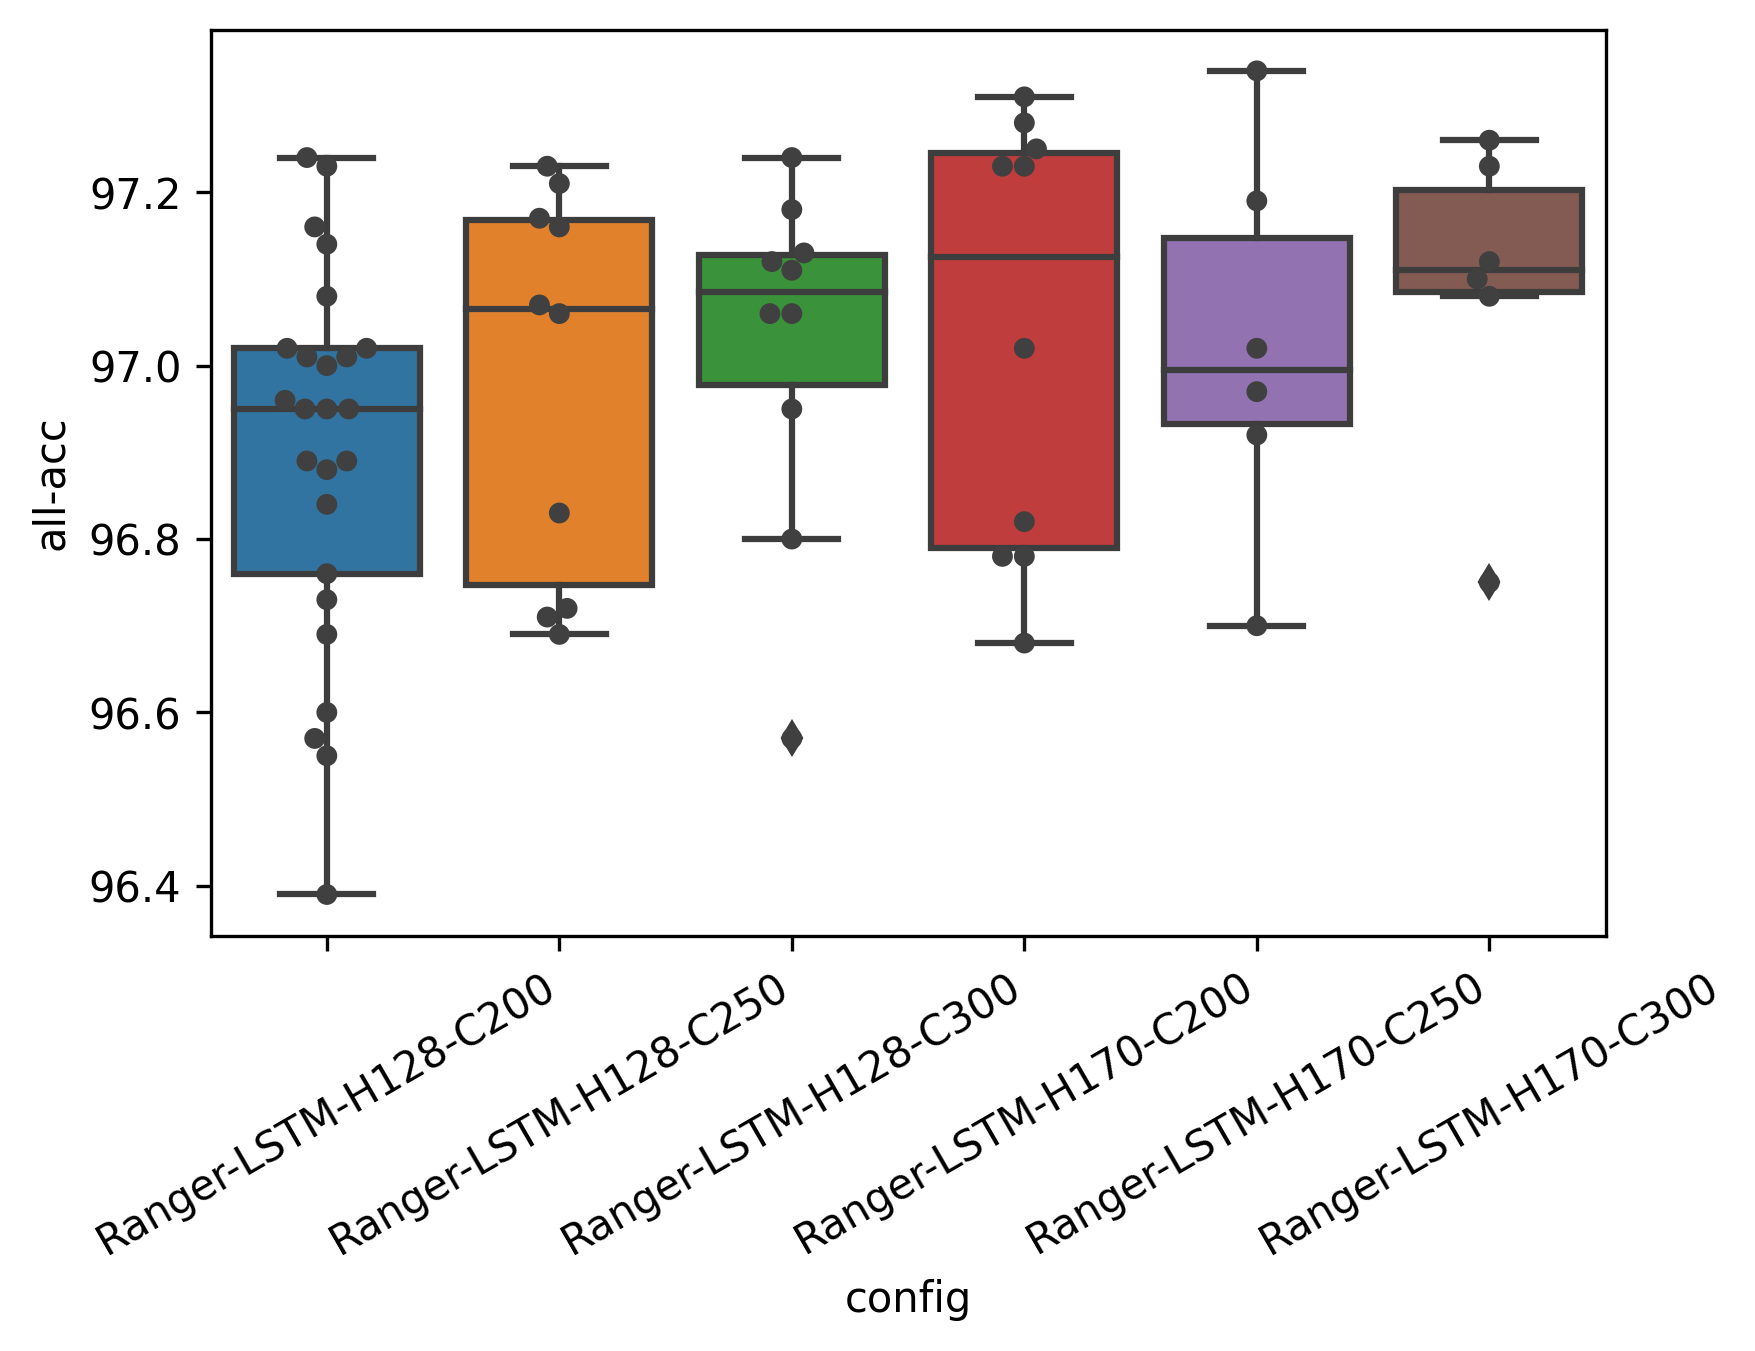

In [8]:
import seaborn as sns


ax = sns.boxplot(y="all-acc", x="config", data=ranks.sort_values("config"))
ax = sns.swarmplot(y="all-acc", x="config", data=ranks.sort_values("config"), color=".25")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.figure.set_dpi(300)

# Evaluating against current best-model

In [9]:
ref_score = {
    task: tuple([
            score
            for cat in model["scores"][task]
            for score in model["scores"][task][cat][:3]
        ]
    )
    for model in ref.values()
    for task in model["scores"]
}

In [10]:
for task in tasks:
    need_diff = column[8:column.index('rank-all-acc')]
    need_diff = need_diff if task == "lemma" else need_diff[:-3]
    
    cols = [
        f"{'-'.join([x[:3] for x in cat.split('-')])}-{score[:3]}"
        for cat in tasks[task][0]["scores"][task]
        for score in ("acc", "prec", "rec")
    ]
    for cat, r in zip(cols, ref_score[task]):
        if f"diff-{cat}" not in ranks.columns:
            ranks[f"diff-{cat}"] = 0
        ranks[f"diff-{cat}"] += (ranks[cat].where(ranks['task'].eq(task)) - r).fillna(0)

# Comparing best model of each configuration 

## With best score

In [11]:
beautiful = {
    "kno-tok": "Known tokens",
    "unk-tok": "Unknown tokens",
    "amb-tok": "Ambiguous tokens",
    "unk-tar": "Unknown target",
    "all": "All"
}
all_cols = [ranks.columns[1], *ranks.columns[6:22]] 
cols = [
    "" if "-" not in colname else beautiful["-".join(colname.split("-")[:-1])]
    for colname in all_cols
]
cols2 = [
    colname if "-" not in colname else colname.split("-")[-1]
    for colname in all_cols
]
new = ranks.sort_values('score', ascending=True)[all_cols].copy().drop_duplicates(['config'])
new.columns = [cols, cols2]

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s >= s.max()-0.1*s.std() # Pondérée comme suit: >= Au meilleur score moins 10% de STD Dev
    return ['background-color: darkgrey' if v else '' for v in is_max]

display(
    HTML(
        new.
            sort_values(("", "score")).
            style.
                set_precision(2).
                #format(lambda x: f"{x:.2f}" if isinstance(x, float) else x).
                apply(highlight_max, axis=0, subset=new.columns[2:]).
                hide_index().
                render(index=False)
    )
)
#display(HTML(new.sort_values(("", "score")).to_html(index=False)))

## With medians

In [12]:
beautiful = {
    "kno-tok": "Known tokens",
    "unk-tok": "Unknown tokens",
    "amb-tok": "Ambiguous tokens",
    "unk-tar": "Unknown target",
    "all": "All"
}
all_cols = [ranks.columns[1], *ranks.columns[6:22]] 
cols = [
    "" if "-" not in colname else beautiful["-".join(colname.split("-")[:-1])]
    for colname in all_cols
]
cols2 = [
    colname if "-" not in colname else colname.split("-")[-1]
    for colname in all_cols
]
new = ranks.sort_values('score', ascending=True)[all_cols].copy().groupby("config").median()
new.columns = [cols[1:], cols2[1:]]  # 0 removed because it becomes the index

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s >= s.max()-0.1*s.std() # Pondérée comme suit: >= Au meilleur score moins 10% de STD Dev
    return ['background-color: darkgrey' if v else '' for v in is_max]

display(
    HTML(
        new.
            sort_values(("", "score")).
            style.
                set_precision(2).
                apply(highlight_max, axis=0, subset=new.columns[1:]).
                render()
    )
)
#display(HTML(new.sort_values(("", "score")).to_html(index=False)))

# Evaluating (un)stability

<ipython-input-13-80c0b51b4737>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


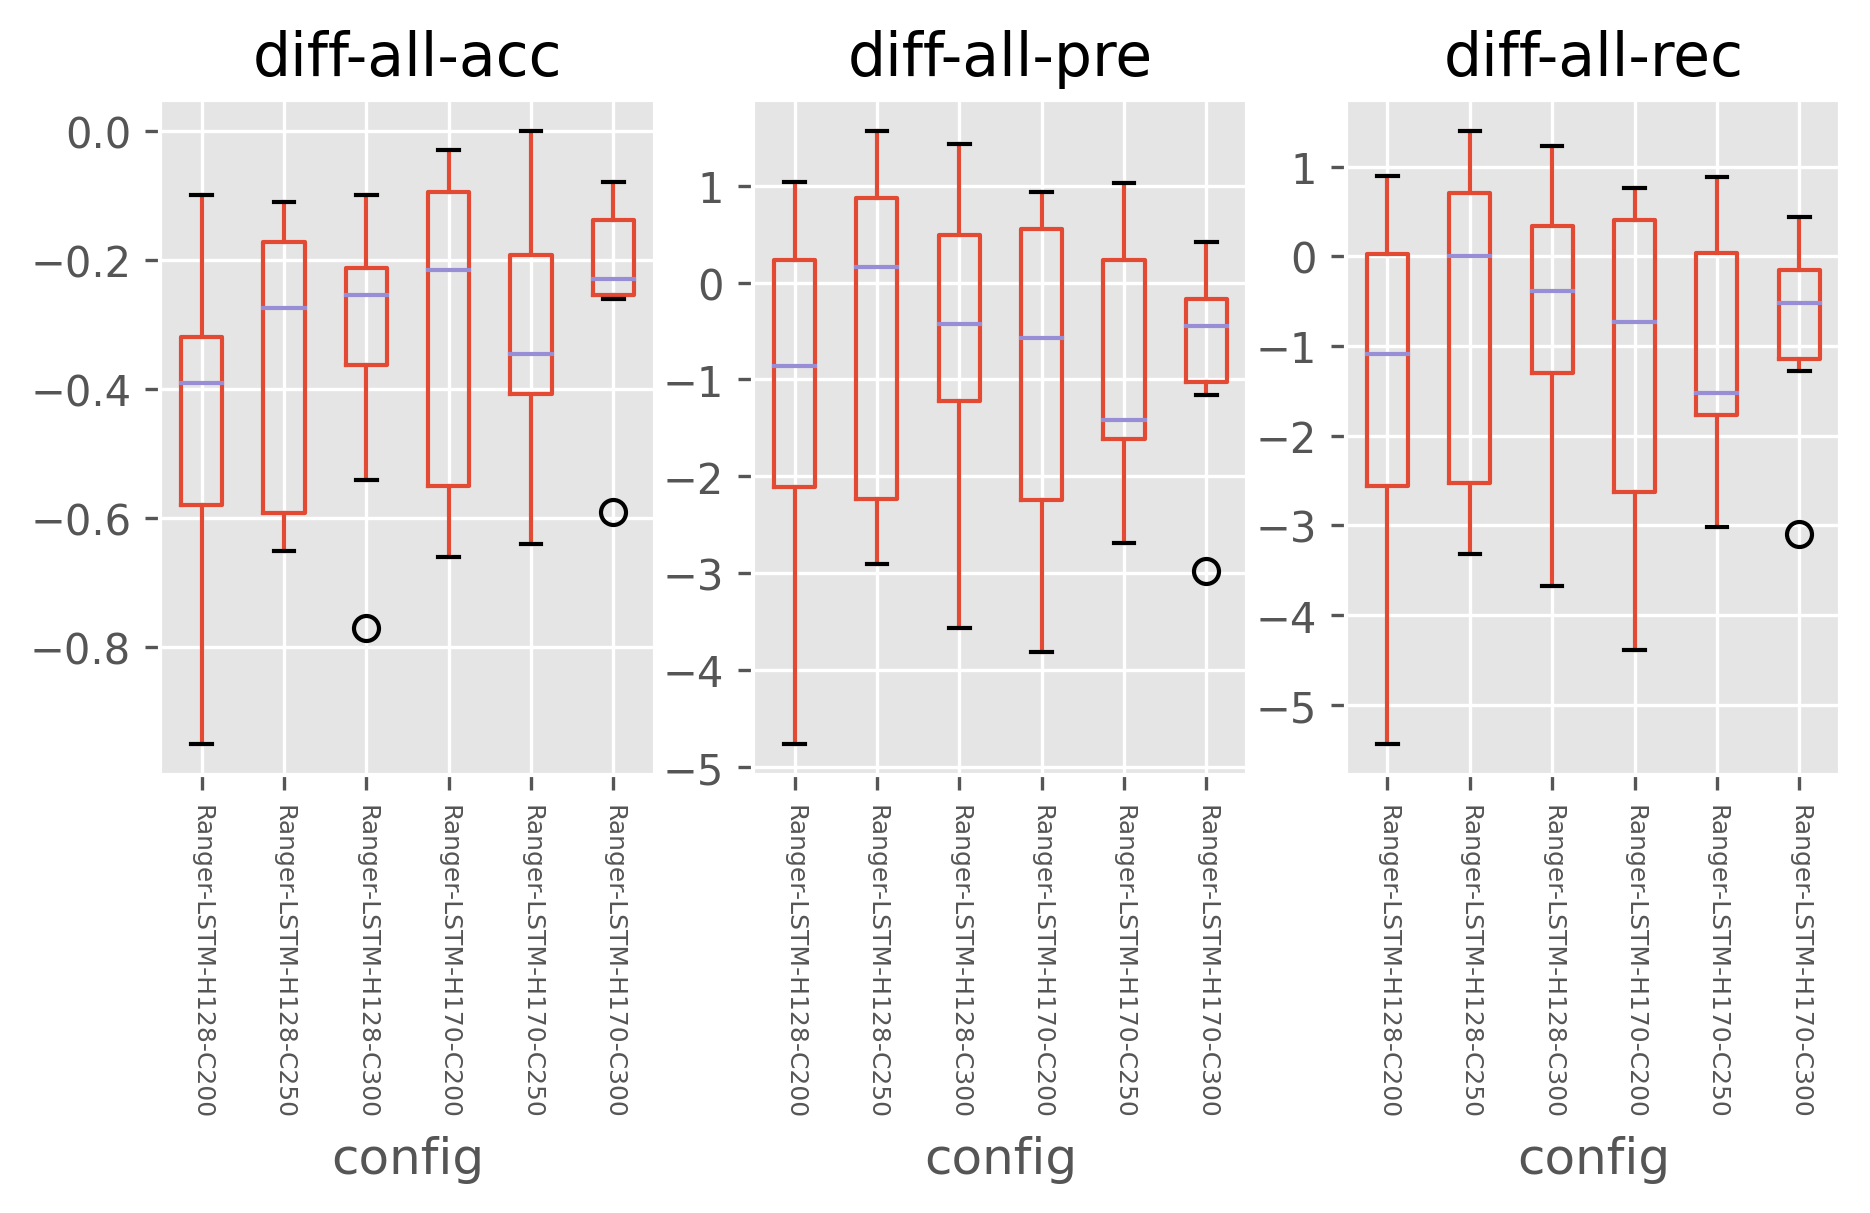

In [13]:
import matplotlib.pyplot as plt    

plt.style.use('ggplot')
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,3), dpi=300)#, sharey=True)
ranks.sort_values("config").boxplot(column="diff-all-acc", by="config", ax=ax1, vert=True, rot=-90)
ranks.sort_values("config").boxplot(column="diff-all-pre", by="config", ax=ax2, vert=True, rot=-90)
ranks.sort_values("config").boxplot(column="diff-all-rec", by="config", ax=ax3, vert=True, rot=-90)
fig.suptitle("")
fig.show()

## Checking Standard Deviation globally

<ipython-input-14-fcf996cfdede>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


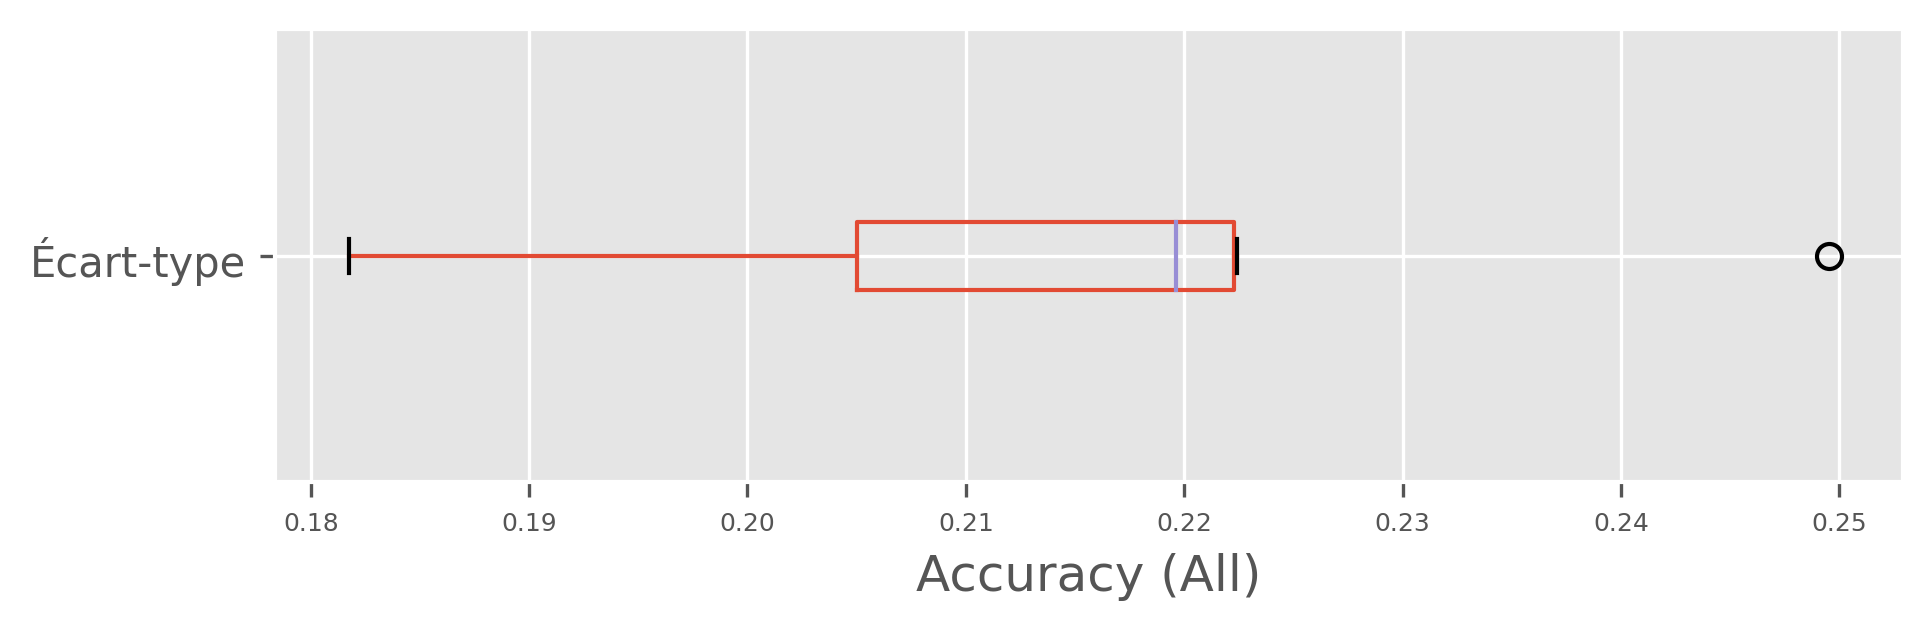

In [14]:
from pandas import Series

fig = plt.figure(figsize=(7,2), dpi=300)
ax = fig.gca()
serie = Series((ranks.groupby("config")["all-acc"].std()).tolist(), name="Écart-type")
ax = serie.plot.box(ax=ax, vert=False)#*100
ax.set_xlabel("Accuracy (All)")
fig.show()

## Looking at standard dev locally

In [15]:
beautiful = {
    "kno-tok": "Known tokens",
    "unk-tok": "Unknown tokens",
    "amb-tok": "Ambiguous tokens",
    "unk-tar": "Unknown target",
    "all": "All"
}
all_cols = [ranks.columns[1], *ranks.columns[7:22]] 
cols = [
    "" if "-" not in colname else beautiful["-".join(colname.split("-")[:-1])]
    for colname in all_cols
]
cols2 = [
    colname if "-" not in colname else colname.split("-")[-1]
    for colname in all_cols
]
new = ranks[all_cols].copy().groupby("config").std()
new.columns = [cols[1:], cols2[1:]]

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s <= s.min()*1.1
    return ['background-color: darkgrey' if v else '' for v in is_max]

display(
    HTML(
        new.
            sort_values(("All", "acc")).
            style.
                set_precision(2).
                #format(lambda x: f"{x:.2f}" if isinstance(x, float) else x).
                apply(highlight_max, axis=0).
                render(index=True)
    )
)

# Keeping the best model only

In [16]:
best = {
}

end_index = column.index('rank-all-acc')
elements = [
    ["file", "task"] + column[8:end_index]
]

for task in tasks:
    best_score = ranks.loc[ranks.task==task, "score"].min()
    print(best_score)
    
    best[task] = ranks.loc[ranks.task==task][ranks["score"]==best_score].index.tolist()[0]
    print(best[task])
    elements.append([
        best[task],
        task,
        *ranks[ranks.index==best[task]][(f"diff-{col}" for col in column[8:end_index])].values.tolist()[0]
    ])

5.9
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_04-19_16_16.tar


In [17]:
# Create a table like representation
import tabulate
from IPython.display import HTML, display

display(HTML(tabulate.tabulate(elements, floatfmt="0.2f", tablefmt='html')))

for task_row in elements[1:]:
    print(f"mv {task_row[0]} bests/{task_row[1]}.tar")

file,task,all-acc,all-pre,all-rec,kno-tok-acc,kno-tok-pre,kno-tok-rec,unk-tok-acc,unk-tok-pre,unk-tok-rec,amb-tok-acc,amb-tok-pre,amb-tok-rec,unk-tar-acc,unk-tar-pre,unk-tar-rec
./models/latin-upc-single-lemma-complexe2-lemma-2021_03_04-19_16_16.tar,lemma,-0.09999999999999432,1.4300000000000068,1.230000000000004,-0.1700000000000017,-0.4300000000000068,-0.4300000000000068,1.3299999999999983,3.260000000000005,2.989999999999995,-0.6700000000000017,-2.6199999999999903,-2.4099999999999966,14.579999999999998,14.530000000000001,14.510000000000005


mv ./models/latin-upc-single-lemma-complexe2-lemma-2021_03_04-19_16_16.tar bests/lemma.tar


## Printing score

In [18]:
reformated = [[row[1], *row[2:5], row[5], row[8], row[11], row[14]] for row in elements]
display(HTML(tabulate.tabulate(
    reformated[1:], headers=reformated[0], tablefmt='html')))
print("-------------------------------------------------------")
print("-------------------------------------------------------")

reformated = [[row[1], *row[2:18]] for row in elements]
beautiful = {
    "kno-tok": "Known tokens",
    "unk-tok": "Unknown tokens",
    "amb-tok": "Ambiguous tokens",
    "unk-tar": "Unknown target",
    "all": "All"
}
cols = [
    "" if "-" not in colname else beautiful["-".join(colname.split("-")[:-1])]
    for colname in reformated[0]
]
cols2 = [
    colname if "-" not in colname else colname.split("-")[-1]
    for colname in reformated[0]
]
new = ranks.filter(items=list(best.values()), axis=0)[reformated[0]].copy()
new.columns = [cols, cols2]
display(HTML(new.sort_values(("", "task")).to_html(index=False)))

task,all-acc,all-pre,all-rec,kno-tok-acc,unk-tok-acc,amb-tok-acc,unk-tar-acc
lemma,-0.1,1.43,1.23,-0.17,1.33,-0.67,14.58


-------------------------------------------------------
-------------------------------------------------------
